# In-Class Assignment: Titanic dataset
### Passenger Information

- passengerid: A unique identifier for each passenger
- name: The full name of the passenger
- sex: Gender of the passenger (male/female)
- age: Age in years (some values are missing)
- sibsp: Number of siblings/spouses aboard the Titanic
- parch: Number of parents/children aboard the Titanic
### Ticket & Fare Details

- ticket: Ticket number
- fare: The ticket price paid
- pclass: The passenger class (1st, 2nd, 3rd class), a proxy for socio-economic status
### Survival & Location Details

- survived: Whether the passenger survived (1) or not (0)
- embark_town: The port where the passenger boarded (Southampton, Cherbourg, Queenstown)
- embarked: Coded version of embark_town (S, C, Q)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Display the first five rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Question 1: Understanding the dataset. Is there any missing
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# Dropping 'deck' column due to high missing values
titanic=titanic.drop(columns=['deck'])

In [5]:
# Imputing missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
print('Missing values after imputation:')
print(titanic.isnull().sum())

Missing values after imputation:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\cason\AppData\Local\Temp\ipykernel_58664\879518986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\cason\AppData\Local\Temp\ipykernel_58664\879518986.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [6]:
# Question 2: Checking for duplicate rows and drop duplicate rows
print('Number of duplicated rows:', titanic.duplicated().sum())

Number of duplicated rows: 116


In [7]:
titanic.duplicated().sum()

116

In [8]:
# Question 3: Average age of passengers
average_age=titanic['age'].mean()
average_age

29.36158249158249

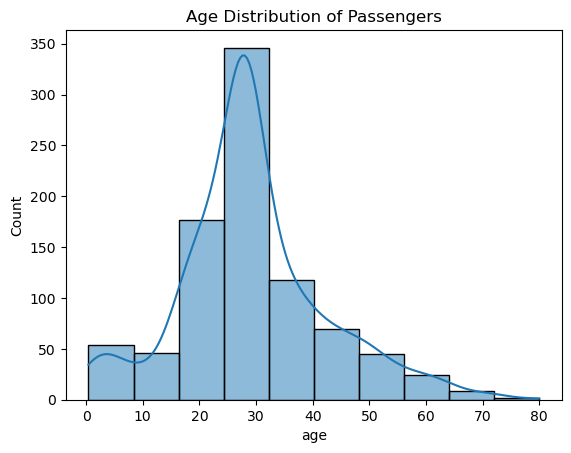

In [9]:
sns.histplot(titanic['age'], bins=10, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

### Visualization: Age distribution using histogram (sns.histplot)
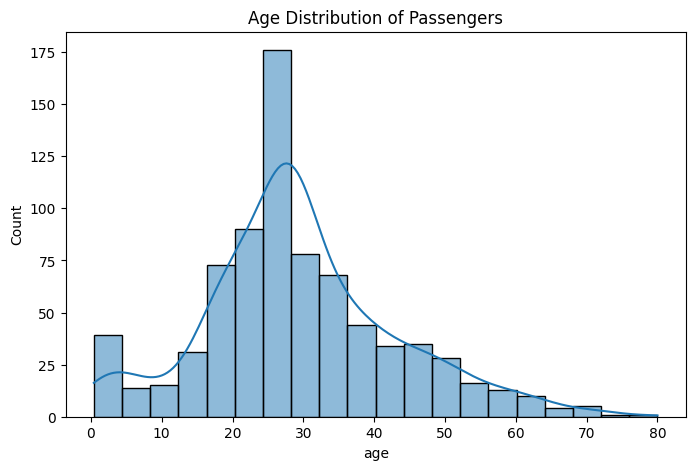

In [11]:
# Question 5: Find out Survival percentage
titanic['survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [12]:
survival_rate = titanic['survived'].mean() * 100
print(f'Survival percentage: {survival_rate:.2f}%')

Survival percentage: 38.38%


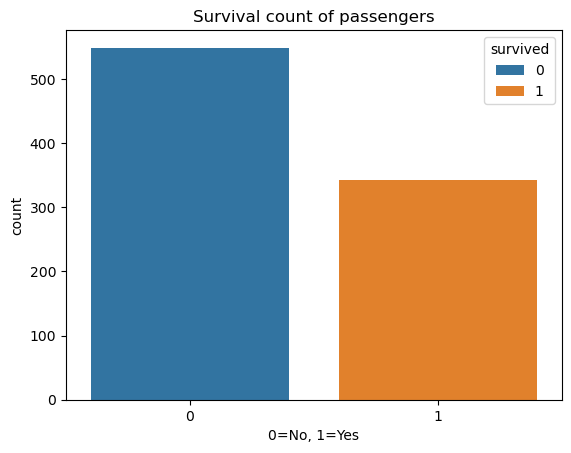

In [13]:
sns.countplot(data=titanic, x='survived', hue='survived')
plt.title('Survival count of passengers')
plt.xlabel('0=No, 1=Yes')
plt.ylabel('count')
plt.show()

### Visualization: Survival count using bar plor
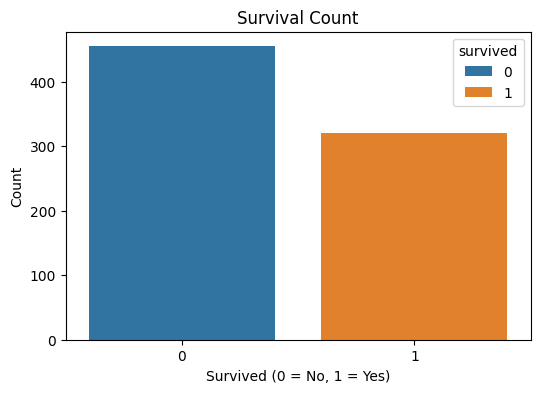

In [15]:
# Question 6: Find out Male to female ratio
male_female_ratio = titanic['sex'].value_counts()
print('Male to female ratio:\n', male_female_ratio)

Male to female ratio:
 sex
male      577
female    314
Name: count, dtype: int64


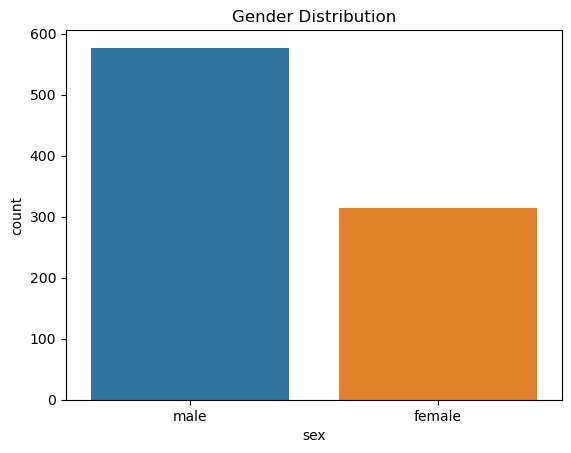

In [16]:
sns.countplot(data=titanic, x='sex', hue='sex')
plt.title('Gender Distribution')
plt.show()

### Visualization: Gender count in bar plot
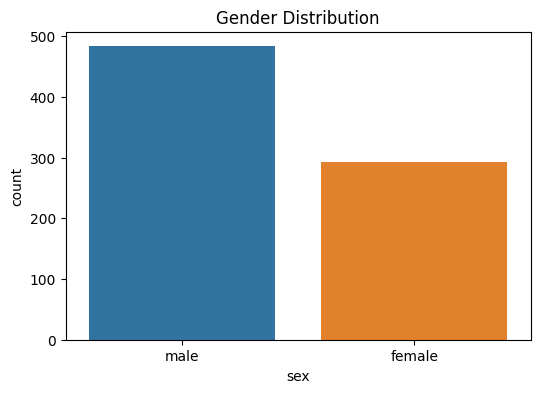


In [18]:
# Question 7: Find out Average fare per pclass
fare_by_class = titanic.groupby('pclass')['fare'].mean()
print('Fare distribution per class:\n', fare_by_class)

Fare distribution per class:
 pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


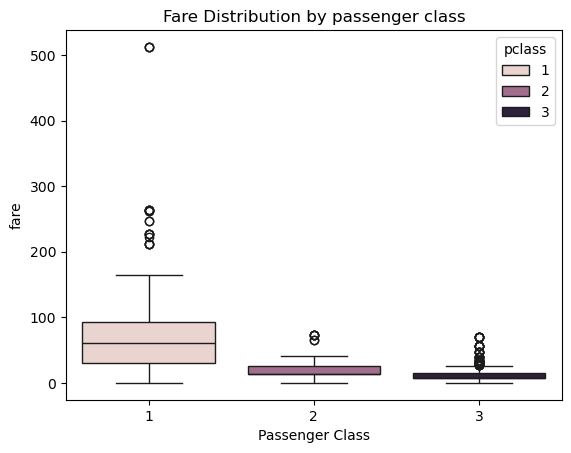

In [19]:
sns.boxplot(data=titanic, x='pclass', y='fare', hue='pclass')
plt.title('Fare Distribution by passenger class')
plt.xlabel('Passenger Class')
plt.show()

### Visualization: Fare distribution per class using box plot sns.boxplot
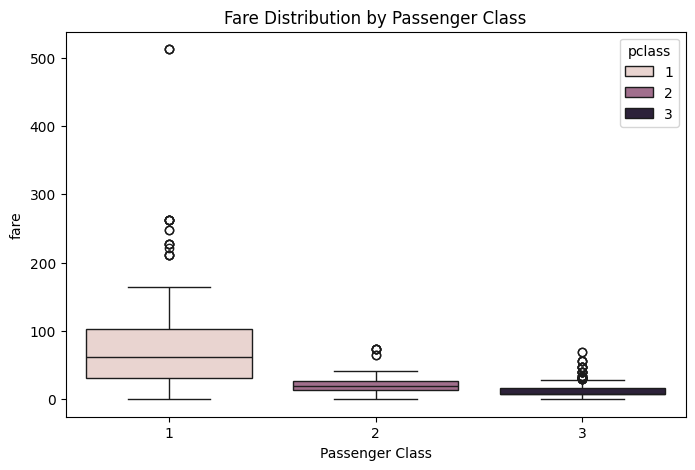

In [21]:
# Question 8: Survival rate across passenger classes
survival_rate_pclass = titanic.groupby('pclass')['survived'].mean() * 100
print(f'Survival Rate by Passenger Class:\n', survival_rate_pclass)

Survival Rate by Passenger Class:
 pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


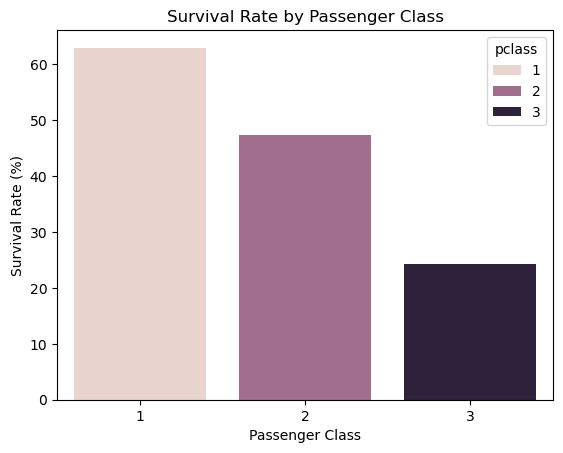

In [22]:
sns.barplot(x=survival_rate_pclass.index, y=survival_rate_pclass.values, hue=survival_rate_pclass.index)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()

### Visualization: Survival by class
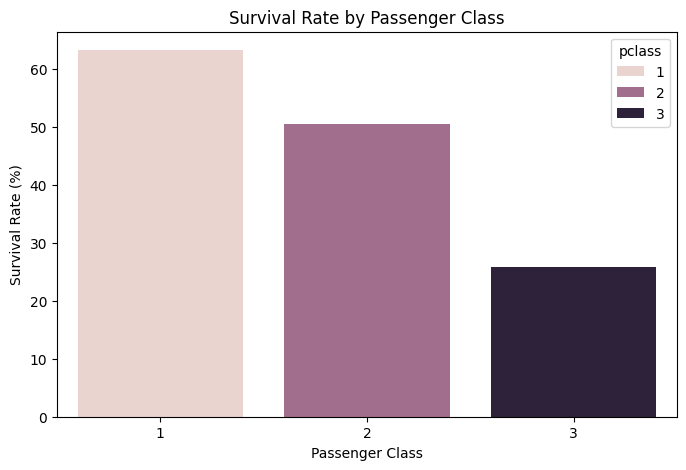

In [49]:
titanic['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [53]:
# Question 9: Survival rate by age groups using condition statement. If age less than 18 Children, <60 adult and else senior
def age_category(age):
    if age < 18:
        return 'Children'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

In [55]:
titanic['age group']=titanic['age'].apply(age_category)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adult


In [59]:
age_survival=titanic.groupby('age group')['survived'].mean() * 100
print('Survival rate by age group:\n', age_survival)

Survival rate by age group:
 age group
Adult       36.436170
Children    53.982301
Senior      26.923077
Name: survived, dtype: float64


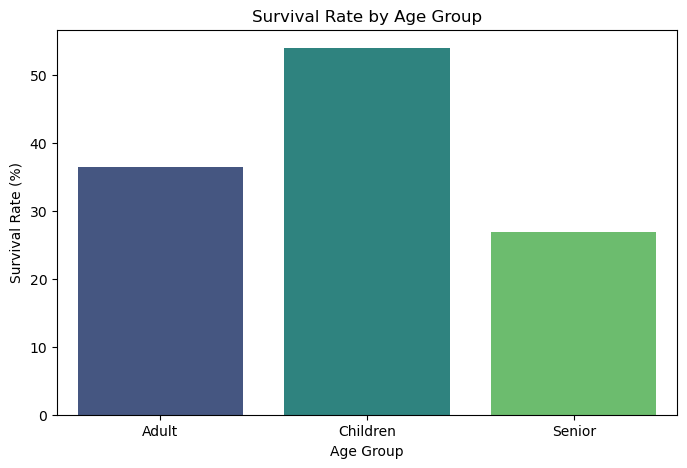

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x=age_survival.index, y=age_survival.values, hue=age_survival.index, palette='viridis')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()

### Visualization: Survival by age group
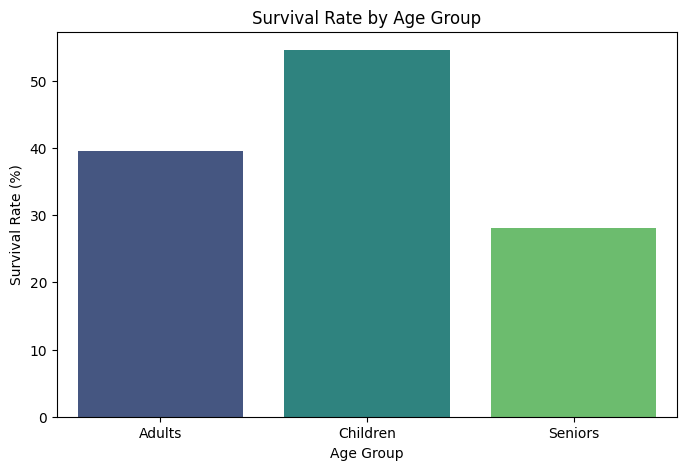

In [63]:
# Question 10: Survival rate by embarkation port
survival_by_embark=titanic.groupby('embark_town')['survived'].mean() * 100
print('Survival rate by embarkation port:\n', survival_by_embark)


Survival rate by embarkation port:
 embark_town
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.900929
Name: survived, dtype: float64


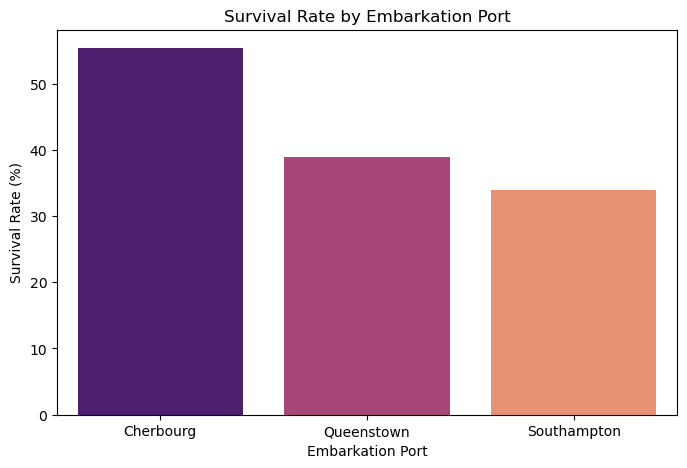

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(x=survival_by_embark.index, y=survival_by_embark.values, hue=survival_by_embark.index, palette='magma')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate (%)')
plt.show()

### Visualization: Survival by embarkation port
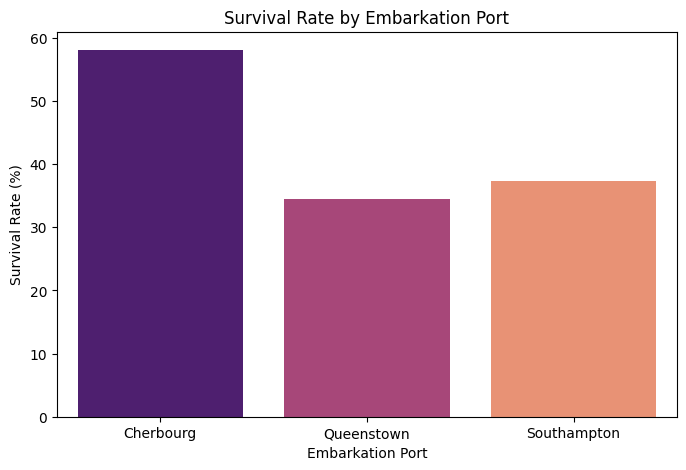